## 1. Import data & libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
project_path = r'C:\Users\cneva\06-2024 Instacart Basket Analysis'

In [4]:
df = pd.read_pickle(os.path.join(project_path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

## 2. PII data consideration

#### - *First and last name columns were dropped in the previous exercise*

## 3. Regional segmentation

### Create region list

In [9]:
region_northeast = [
    'Maine',
    'New Hampshire',
    'Vermont',
    'Massachusetts',
    'Rhode Island',
    'Connecticut',
    'New York',
    'Pennsylvania',
    'New Jersey'
]

In [10]:
region_midwest = [
    'Wisconsin',
    'Michigan',
    'Illinois',
    'Indiana',
    'Ohio',
    'North Dakota',
    'South Dakota',
    'Nebraska',
    'Kansas',
    'Minnesota',
    'Iowa',
    'Missouri'
]

In [11]:
region_south = [
    'Delaware',
    'Maryland',
    'District of Columbia',
    'Virginia',
    'West Virginia',
    'North Carolina',
    'South Carolina',
    'Georgia',
    'Florida',
    'Kentucky',
    'Tennessee',
    'Mississippi',
    'Alabama',
    'Oklahoma',
    'Texas',
    'Arkansas',
    'Louisiana'
]

In [12]:
region_west = [
    'Idaho',
    'Montana',
    'Wyoming',
    'Nevada',
    'Utah',
    'Colorado',
    'Arizona',
    'New Mexico',
    'Alaska',
    'Washington',
    'Oregon',
    'California',
    'Hawaii'
]

### Create region column

In [14]:
df.loc[df['state'].isin(region_northeast), 'region'] = 'Northeast'

In [15]:
df.loc[df['state'].isin(region_midwest), 'region'] = 'Midwest'

In [16]:
df.loc[df['state'].isin(region_south), 'region'] = 'South'

In [17]:
df.loc[df['state'].isin(region_west), 'region'] = 'West'

In [18]:
df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

### Spending habits by region 

In [20]:
region_ct = pd.crosstab(df['region'], df['user_spender_type'], dropna = False)
region_ct['High spender % of total'] = region_ct['High spender'] / (region_ct['High spender'] + region_ct['Low spender'])

In [21]:
region_ct

user_spender_type,High spender,Low spender,High spender % of total
region,,,
Midwest,155975,7441350,0.020530
Northeast,108225,5614511,0.018911
South,209691,10582194,0.019430
West,160354,8132559,0.019336


#### - *The number of high spenders per region are fairly consistent*

## 4. Cull low-activity customers

In [24]:
# return dataframe with rows max_order >= 5
df_2 = df[df['max_order'] >= 5]

In [25]:
df_2.shape

(30964564, 32)

In [26]:
df_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,user_median_days_since,user_order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [440]:
df_2.shape

(30964564, 37)

In [442]:
df.shape

(32404859, 32)

In [27]:
df_2.to_pickle(os.path.join(project_path, '02 Data', 'Prepared Data', 'ords_prods_cust_2.pkl'))

## 5. Create customer profiling variables

### 5a. Age Groups 

In [30]:
# create column age_group based on following categories:
# young adult: age < 26
# adult: 26 <= age < 65
# senior: age >= 65

In [31]:
df_2.loc[df['age'] < 26, 'age_group'] = 'Young Adult'

C:\Users\cneva\AppData\Local\Temp\ipykernel_7036\2161847552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df['age'] < 26, 'age_group'] = 'Young Adult'


In [32]:
df_2.loc[ (df['age'] >= 26) & (df['age'] < 65), 'age_group'] = 'Adult'

In [33]:
df_2.loc[df['age'] >= 65, 'age_group'] = 'Senior'

### 5b. Income Groups

In [35]:
# create column income_group based on following categories:
# low: income < 50,000
# middle: 50,000 <= income < 100,000
# high: income >= 100,000

In [36]:
df_2.loc[df['income'] < 40000, 'income_group'] = 'Low'

C:\Users\cneva\AppData\Local\Temp\ipykernel_7036\2447248641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df['income'] < 40000, 'income_group'] = 'Low'


In [37]:
df_2.loc[ (df['income'] >= 40000) & (df['income'] < 100000), 'income_group'] = 'Middle'

In [38]:
df_2.loc[df['income'] >= 100000, 'income_group'] = 'High'

### 5c. Dependancy Groups 

In [40]:
# create column dependent_group based on following categories:
# no dependents: n_dependents = 0
# has dependents: n_dependents > 0

In [41]:
df_2.loc[df['n_dependants'] == 0, 'dependant_group'] = 'No dependants'

C:\Users\cneva\AppData\Local\Temp\ipykernel_7036\4155179954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df['n_dependants'] == 0, 'dependant_group'] = 'No dependants'


In [42]:
df_2.loc[df['n_dependants'] > 0, 'dependant_group'] = 'Has dependants'

### 5d. Department Groups - Pet Owners 

In [44]:
# read department file
df_dep = pd.read_csv(os.path.join(project_path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [45]:
# create subset of users that ordered from pet department
df_pet_users = df_2[df_2['department_id'] == 8]['user_id'].unique()

In [46]:
# label user_ids who have purchased from pet department
df_2.loc[ df_2['user_id'].isin(df_pet_users), 'pet_owner'] = 'Y'

C:\Users\cneva\AppData\Local\Temp\ipykernel_7036\884557703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[ df_2['user_id'].isin(df_pet_users), 'pet_owner'] = 'Y'


In [47]:
df_2.loc[ ~df_2['user_id'].isin(df_pet_users), 'pet_owner'] = 'N'

### 5e. Single Adults 

In [49]:
# create column young_adult based on following categories:
# Y: age_group == Young adult & fam_status == single
# N: 
df_2.loc[ ((df_2['age_group'] == 'Young Adult') | (df_2['age_group'] == 'Adult')) & (df_2['fam_status'] == 'single'), 'single_adult'] = 'Y'

C:\Users\cneva\AppData\Local\Temp\ipykernel_7036\4234576651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[ ((df_2['age_group'] == 'Young Adult') | (df_2['age_group'] == 'Adult')) & (df_2['fam_status'] == 'single'), 'single_adult'] = 'Y'


In [50]:
df_2.loc[ df_2['single_adult'].isnull(), 'single_adult'] = 'N'

## 6. Create visualization of distribution of profiles 

### 6a. Age Groups 

In [53]:
# group by age group and count the number of unique users
age_group_user_count = df_2.groupby('age_group')['user_id'].nunique().sort_values(ascending = True)

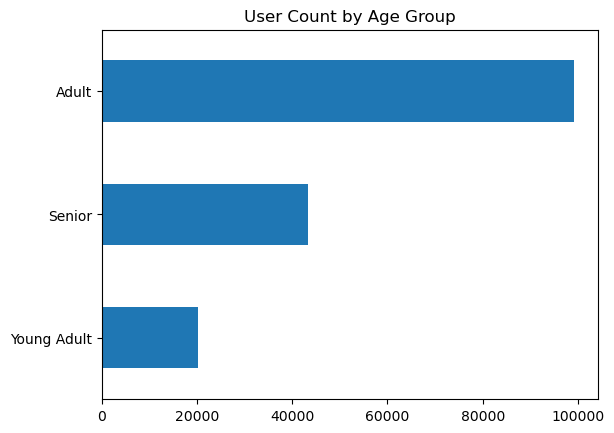

In [414]:
# plot visualization
age_group_user_count_bar = age_group_user_count.plot(
    kind = 'barh',
    title = 'User Count by Age Group',
    ylabel = ''
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_agegroup_usercount.png'))

### 6b. Income Groups

In [56]:
# group by income group and count the number of unique users
income_group_user_count = df_2.groupby('income_group')['user_id'].nunique().sort_values(ascending = True)

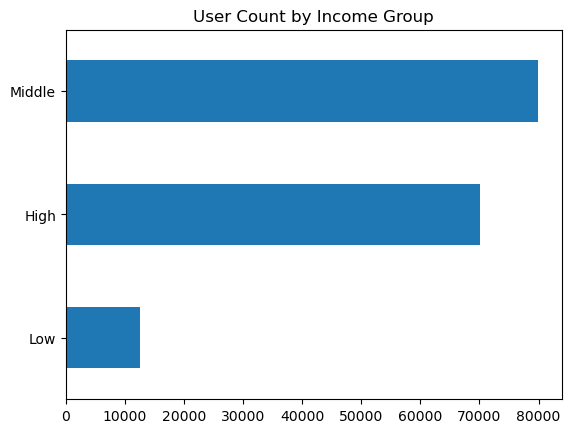

In [418]:
# plot visualization
income_group_user_count_bar = income_group_user_count.plot(
    kind = 'barh',
    title = 'User Count by Income Group',
    ylabel = ''
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_incomegroup_usercount.png'))

### 6c. Dependancy Groups

In [59]:
# group by dependant_group and count the number of unique users
dependant_group_user_count = df_2.groupby('dependant_group')['user_id'].nunique().sort_values(ascending = True)

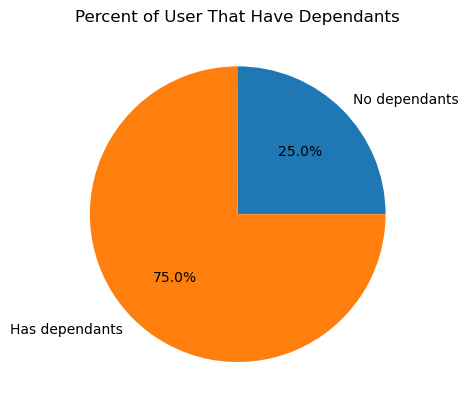

In [420]:
# plot visualization
dependancy_group_user_count_bar = dependant_group_user_count.plot(
    kind = 'pie',
    title = 'Percent of User That Have Dependants',
    ylabel = '',
    autopct='%1.1f%%'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_dependant_usercount.png'))

### 6d. Department Groups - Pet Owners 

In [62]:
# group by pet owners and count the number of unique users
pet_owner_user_count = df_2.groupby('pet_owner')['user_id'].nunique().sort_values(ascending = True)

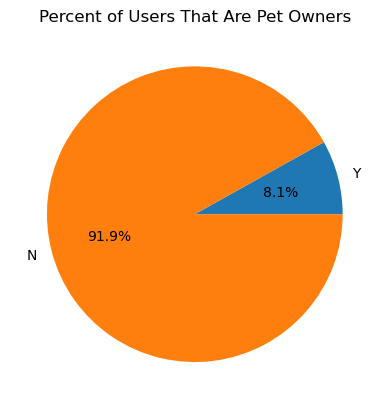

In [422]:
# plot visualization
pet_owner_user_count_bar = pet_owner_user_count.plot(
    kind = 'pie',
    title = 'Percent of Users That Are Pet Owners',
    ylabel = '',
    autopct='%1.1f%%'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_petowner_usercount.png'))

### 6e. Single Adults

In [65]:
# group by single and count the number of unique users
single_user_count = df_2.groupby('single_adult')['user_id'].nunique().sort_values(ascending = True)

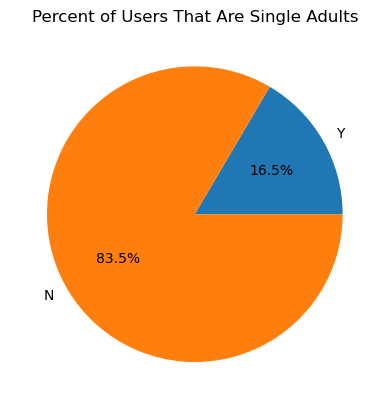

In [424]:
# plot visualization
single_user_count_bar = single_user_count.plot(
    kind = 'pie',
    title = 'Percent of Users That Are Single Adults',
    ylabel = '',
    autopct='%1.1f%%'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_singleadult_usercount.png'))

## 7. Aggregate max, mean, min on customer-profile level for usage frequency and expenditure 

In [68]:
# aggregate df to customer level
df_3 = df_2.groupby(['user_id', 'max_order', 'age_group', 'income_group', 'dependant_group', 'pet_owner', 'single_adult', 'region']).agg(
    total_spent=('prices', 'sum'),
    order_frequency=('days_since_prior_order', 'mean')
).reset_index()

In [69]:
# check customer level
df_3.head()

,user_id,max_order,age_group,income_group,dependant_group,pet_owner,single_adult,region,total_spent,order_frequency
0,1,10,Adult,Middle,Has dependants,N,N,South,375.7,20.259259
1,10,5,Adult,Middle,Has dependants,N,N,South,1237.1,20.746377
2,100,5,Adult,High,Has dependants,N,N,South,266.2,26.320000
3,1000,7,Young Adult,Middle,Has dependants,N,N,South,866.0,11.647727
4,10000,72,Adult,Middle,No dependants,N,Y,South,8785.6,4.949580


In [70]:
df_3.shape

(162631, 10)

In [71]:
df_2['user_id'].nunique()

162631

### 7a. Age Group 

In [73]:
df_3.groupby('age_group').agg({'total_spent' : ['mean', 'min', 'max'],
                              'order_frequency' : ['mean', 'min', 'max']})

total_spent                  order_frequency                
                    mean   min        max            mean       min   max
age_group                                                                
Adult        2278.307858   5.0  2104114.1       14.362957  0.000000  30.0
Senior       2228.007126   6.8  1409778.9       14.305956  0.000000  30.0
Young Adult  2336.153231  10.5  2101976.9       14.333850  0.583333  30.0

### 7b. Income Group 

In [75]:
df_3.groupby('income_group').agg({'total_spent' : ['mean', 'min', 'max'],
                              'order_frequency' : ['mean', 'min', 'max']})

total_spent                  order_frequency           
                     mean   min        max            mean  min   max
income_group                                                         
High          3337.213784  24.7  2104114.1       14.175400  0.0  30.0
Low            830.323160   5.0    24307.1       15.232918  0.0  30.0
Middle        1565.945230   6.8  1102546.5       14.351793  0.0  30.0

### 7c. Dependancy Group 

In [77]:
df_3.groupby('dependant_group').agg({'total_spent' : ['mean', 'min', 'max'],
                              'order_frequency' : ['mean', 'min', 'max']})

total_spent                 order_frequency           
                        mean  min        max            mean  min   max
dependant_group                                                        
Has dependants   2262.809882  6.8  2104114.1       14.338553  0.0  30.0
No dependants    2299.965765  5.0  2101976.9       14.361036  0.0  30.0

### 7d. Department Group - Pet Owners 

In [79]:
df_3.groupby('pet_owner').agg({'total_spent' : ['mean', 'min', 'max'],
                              'order_frequency' : ['mean', 'min', 'max']})

total_spent                  order_frequency                
                  mean   min        max            mean       min   max
pet_owner                                                              
N          2141.994515   5.0  2104114.1       14.439277  0.000000  30.0
Y          3748.185913  24.9  1206437.5       13.265452  0.717842  30.0

### 7e. Single Adults 

In [81]:
df_3.groupby('single_adult').agg({'total_spent' : ['mean', 'min', 'max'],
                              'order_frequency' : ['mean', 'min', 'max']})

total_spent                 order_frequency           
                     mean  min        max            mean  min   max
single_adult                                                        
N             2256.991936  6.8  2104114.1       14.332581  0.0  30.0
Y             2348.434012  5.0  2101976.9       14.402737  0.0  30.0

## 8. Compare customer profiles with regions and departments 

### 8.1 Region Comparison

#### 8.1.a. Age Group 

In [85]:
# group by region and age
age_region = df_3.groupby(['age_group', 'region'])['user_id'].nunique().reset_index(name='user_count')

In [86]:
age_region

,age_group,region,user_count
0,Adult,Midwest,23498
1,Adult,Northeast,17527
2,Adult,South,32910
3,Adult,West,25249
4,Senior,Midwest,10169
5,Senior,Northeast,7580
6,Senior,South,14433
7,Senior,West,11068
8,Young Adult,Midwest,4709
9,Young Adult,Northeast,3474


In [87]:
# pivot to visualize
age_region_pivot = age_region.pivot(index='age_group', columns='region', values='user_count')

In [88]:
age_region_pivot

region,Midwest,Northeast,South,West
age_group,,,,
Adult,23498,17527,32910,25249
Senior,10169,7580,14433,11068
Young Adult,4709,3474,6850,5164


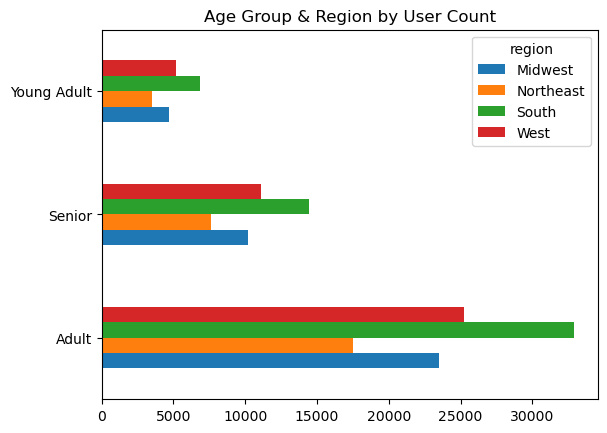

In [426]:
# visualize
age_region_usercount = age_region_pivot.plot(
    kind = 'barh',
    ylabel = '',
    title = 'Age Group & Region by User Count'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_age_region_usercount.png'))

#### 8.1.b. Income Group

In [91]:
# group by region and income
income_region = df_3.groupby(['income_group', 'region'])['user_id'].nunique().reset_index(name='user_count')

In [92]:
# pivot to visualize
income_region_pivot = income_region.pivot(index='income_group', columns='region', values='user_count')

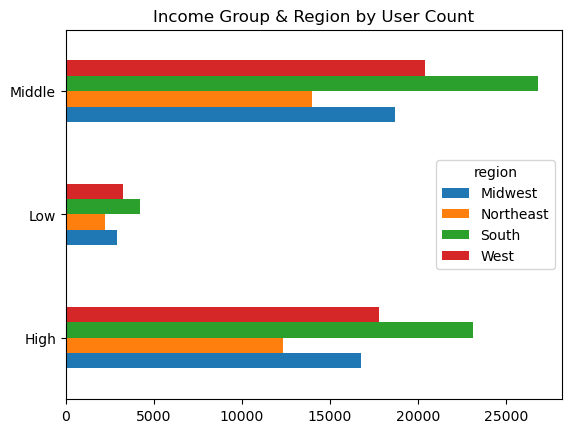

In [428]:
# visualize
income_region_pivot.plot(
    kind = 'barh',
    ylabel = '',
    title = 'Income Group & Region by User Count'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_income_region_usercount.png'))

#### 8.1.c. Dependancy Group

In [95]:
# group by region and income
dependancy_region = df_3.groupby(['dependant_group', 'region'])['user_id'].nunique().reset_index(name='user_count')

In [96]:
# pivot to visualize
dependancy_region_pivot = dependancy_region.pivot(index='dependant_group', columns='region', values='user_count')

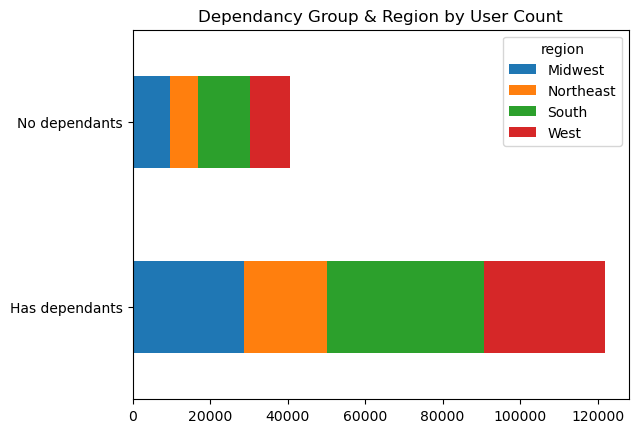

In [430]:
# visualize
dependancy_region_pivot.plot(
    kind = 'barh',
    stacked = True,
    ylabel = '',
    title = 'Dependancy Group & Region by User Count'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_dependancy_region_usercount.png'))

#### 8.1.d. Department Group - Pet Owners

In [99]:
# group by region and income
pet_owner_region = df_3.groupby(['pet_owner', 'region'])['user_id'].nunique().reset_index(name='user_count')

In [100]:
pet_owner_region

,pet_owner,region,user_count
0,N,Midwest,35263
1,N,Northeast,26282
2,N,South,49868
3,N,West,38043
4,Y,Midwest,3113
5,Y,Northeast,2299
6,Y,South,4325
7,Y,West,3438


In [101]:
# pivot to visualize
pet_owener_region_pivot = pet_owner_region.pivot(index='region', columns='pet_owner', values='user_count')

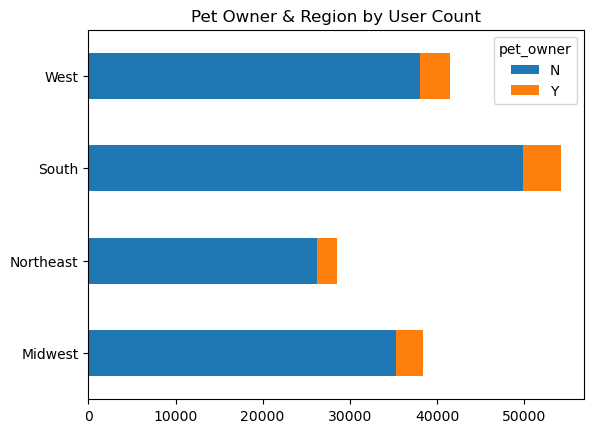

In [432]:
# visualize
pet_owner_region_user_count = pet_owener_region_pivot.plot(
    kind = 'barh',
    stacked = True,
    ylabel = '',
    title = 'Pet Owner & Region by User Count'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_petowner_region_usercount.png'))

### 8.1.e. Single Adults Group

In [104]:
# group by region and income
single_adult_region = df_3.groupby(['single_adult', 'region'])['user_id'].nunique().reset_index(name='user_count')

In [105]:
single_adult_region

,single_adult,region,user_count
0,N,Midwest,32017
1,N,Northeast,23797
2,N,South,45261
3,N,West,34660
4,Y,Midwest,6359
5,Y,Northeast,4784
6,Y,South,8932
7,Y,West,6821


In [191]:
# pivot to visualize
single_adult_region_pivot = single_adult_region.pivot(index='region', columns='single_adult', values='user_count')

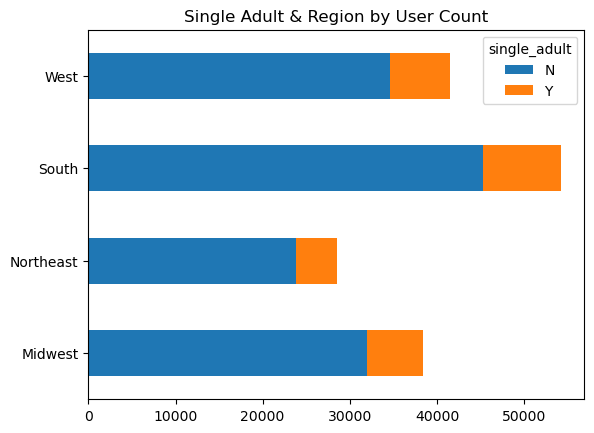

In [434]:
# visualize
single_adult_region_pivot.plot(
    kind = 'barh',
    stacked = True,
    ylabel = '',
    title = 'Single Adult & Region by User Count'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_singleadult_region_usercount.png'))

### 8.2 Department comparison 

In [324]:
# create df_4 for order and department level
# aggregate df to customer level
df_4 = df_2.groupby(['order_id', 'department_id', 'max_order', 'age_group', 'income_group', 'dependant_group', 'pet_owner', 'single_adult', 'region']).agg(
    total_spent=('prices', 'sum')
).reset_index()

In [325]:
df_dep.columns = ['department_id', 'department']

In [326]:
# merge df_4 with department name
df_4 = pd.merge(df_4, df_dep, on = 'department_id')

In [327]:
# get top 3 departments
top_3_departments = df_4.groupby(['department'])['order_id'].nunique().reset_index().sort_values(by = 'order_id', ascending = False)

In [333]:
# filter df_4 for top_3 departments only
top_3_departments = top_3_departments.reset_index(drop = True).head(3)

In [335]:
df_4 = df_4[df_4['department'].isin(top_3_departments['department'])]

#### 8.2.a. Age Group

In [379]:
# group by department and age
age_department = df_4.groupby(['department', 'age_group'])['order_id'].nunique().reset_index(name='order_count')
age_department.head()

,department,age_group,order_count
0,beverages,Adult,848052
1,beverages,Senior,370488
2,beverages,Young Adult,172964
3,dairy eggs,Adult,1269977
4,dairy eggs,Senior,551742


In [383]:
# pivot to visualize
age_department_pivot = age_department.pivot(index='department', columns='age_group', values='order_count')

In [349]:
age_department_pivot

age_group,Adult,Senior,Young Adult
department,,,
beverages,848052,370488,172964
dairy eggs,1269977,551742,258453
produce,1404385,612013,287285


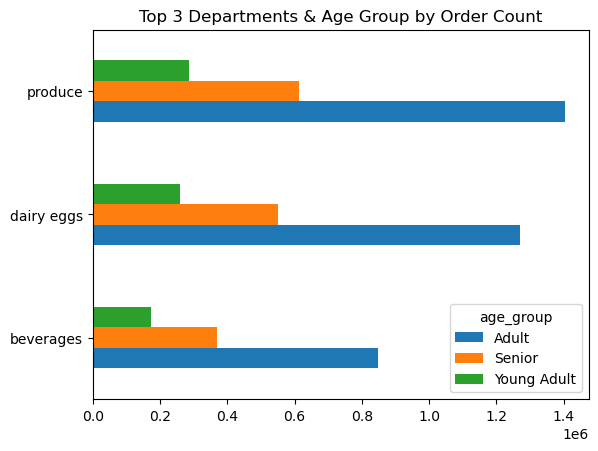

In [436]:
# visualize
age_department_pivot.plot(
    kind = 'barh',
    ylabel = '',
    title = 'Top 3 Departments & Age Group by Order Count'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_department_agegroup_usercount.png'))

#### 8.2.b. Income Group

In [390]:
# group by department and income group
income_department = df_4.groupby(['department', 'income_group'])['order_id'].nunique().reset_index(name = 'order_count')

In [391]:
income_department.head()

,department,income_group,order_count
0,beverages,High,610741
1,beverages,Low,99074
2,beverages,Middle,681689
3,dairy eggs,High,951432
4,dairy eggs,Low,110895


In [394]:
# pivot to visualize
income_department_pivot = income_department.pivot(index='department', columns='income_group', values='order_count')

In [396]:
age_department_pivot

age_group,Adult,Senior,Young Adult
department,,,
beverages,848052,370488,172964
dairy eggs,1269977,551742,258453
produce,1404385,612013,287285


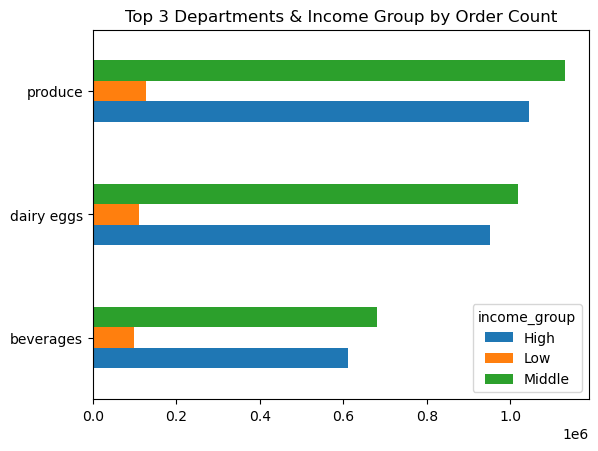

In [438]:
# visualize
income_department_pivot.plot(
    kind = 'barh',
    ylabel = '',
    title = 'Top 3 Departments & Income Group by Order Count'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', '4.10_department_incomegroup_usercount.png'))

## Additional analysis

### Key Question 1: The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders

In [900]:
order_dow_frequency = df_2.groupby(['orders_day_of_week'])['order_id'].nunique().reset_index()

In [901]:
order_dow_frequency

,orders_day_of_week,order_id
0,0,529224
1,1,531258
2,2,421534
3,3,393439
4,4,383531
5,5,407456
6,6,397933


In [894]:
dow_map = {
    0: 'Sat',
    1: 'Sun',
    2: 'Mon',
    3: 'Tue',
    4: 'Wed',
    5: 'Thr',
    6: 'Fri'
}

In [904]:
order_dow_frequency['orders_day_of_week_name'] = order_dow_frequency['orders_day_of_week'].replace(dow_map)

In [924]:
order_dow_frequency

,orders_day_of_week,order_id,orders_day_of_week_name
0,0,529224,Sat
1,1,531258,Sun
2,2,421534,Mon
3,3,393439,Tue
4,4,383531,Wed
5,5,407456,Thr
6,6,397933,Fri


In [932]:
order_dow_frequency_2 = order_dow_frequency[['orders_day_of_week_name','order_id']].set_index('orders_day_of_week_name')

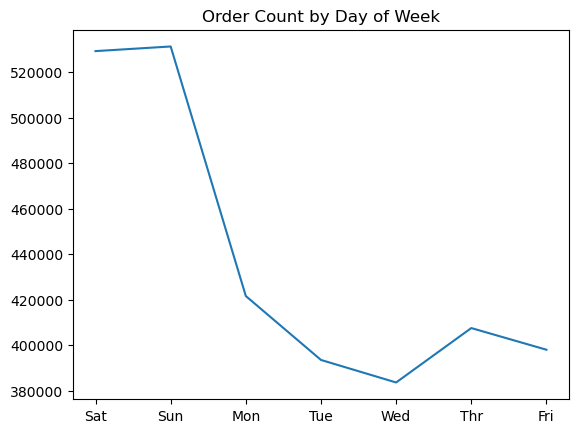

In [940]:
order_dow_frequency_2.plot(
    legend = False,
    title = 'Order Count by Day of Week',
    xlabel =''
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'order_count_by_dow.png'))

In [956]:
price_by_hod = df_2.groupby('order_hour_of_day').agg(sum_of_sales = ('prices','mean'))

<Axes: xlabel='order_hour_of_day'>

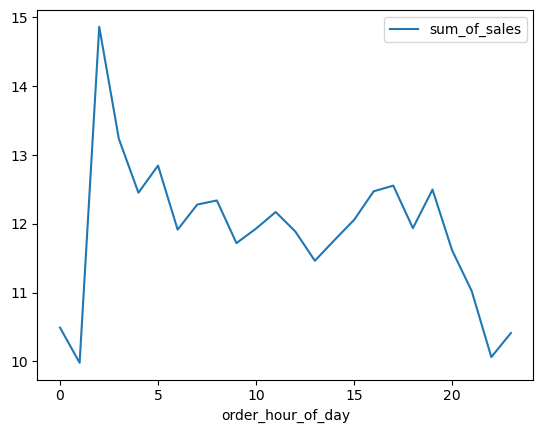

In [958]:
price_by_hod.plot()

### Key Question 3: Instacart has a lot of products with different price tags. Marketing and sales wants to use simpler price range groupings to help direct their efforts

In [448]:
pd.set_option('display.max_columns', None)

In [450]:
df.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_day_2,busiest_period_of_day,max_order,loyalty_flag,user_average_price,user_spender_type,user_median_days_since,user_order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [454]:
price_range = df_2.groupby('price_range_loc')['product_id'].nunique()

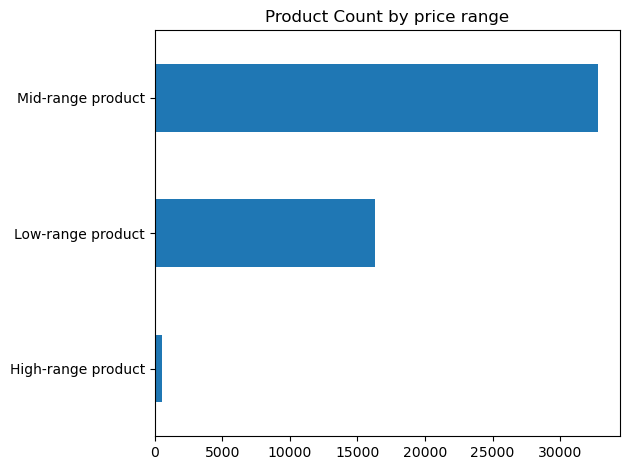

In [474]:
price_range.plot(
    kind = 'barh',
    title = 'Product Count by price range',
    ylabel =''
)
plt.tight_layout() # adjustment to see y label
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'product_count_by_price_range.png'))

### Key Question 4: Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders

In [510]:
orders_by_department = df_2.groupby('department_id')['order_id'].nunique()

In [511]:
orders_by_department_bar = pd.merge(orders_by_department, df_dep, on = 'department_id').sort_values(by = 'order_id', ascending = True)

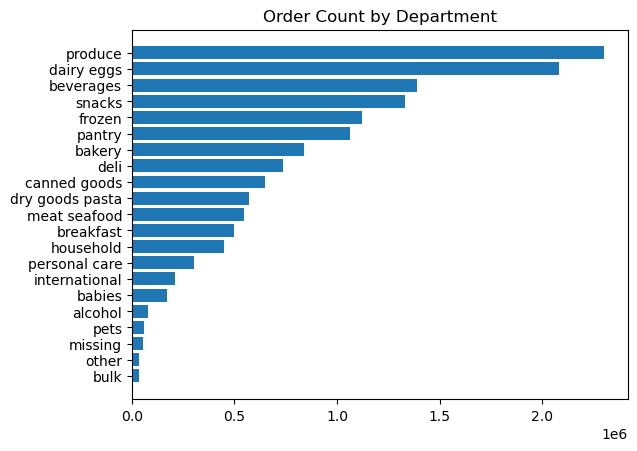

In [512]:
plt.barh(orders_by_department_bar['department'], orders_by_department_bar['order_id'])
plt.title('Order Count by Department')
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'order_count_by_department.png'))

### Key Question 5: What's the distribution among users in regards to their brand loyalty? (i.e, how often do they return to Instacart?)

In [513]:
users_by_loyalty = df_2.groupby('loyalty_flag')['user_id'].nunique()

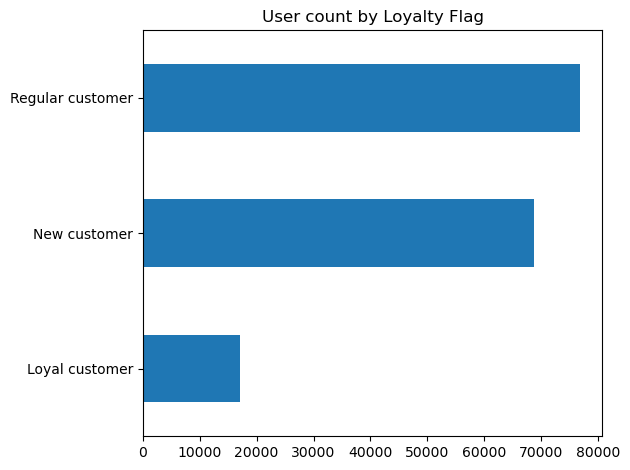

In [526]:
users_by_loyalty.plot(
    kind = 'barh',
    title = 'User count by Loyalty Flag',
    ylabel = ''
)
plt.tight_layout() # adjustment to see y label
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'user_count_by_loyalty.png'))

### Key Question 6: Are there differences in ordering habits based on a customer's loyalty status?

In [530]:
order_frequency_by_loyalty = df_2.groupby('loyalty_flag').agg(median_order_frequency=('days_since_prior_order', 'median'))

<Axes: title={'center': 'Average days between order by loyalty'}, ylabel='loyalty_flag'>

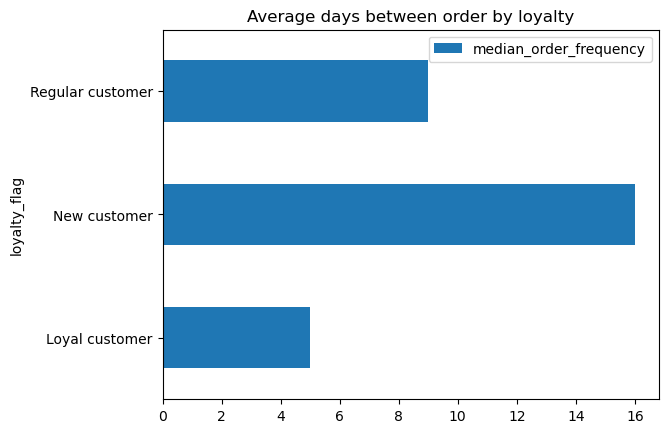

In [536]:
order_frequency_by_loyalty.plot(
    kind = 'barh',
    title = 'Average days between order by loyalty',
    ylabel = ''
)

In [542]:
order_frequency_by_loyalty.sort_values(by = 'median_order_frequency', ascending = True)

,median_order_frequency
loyalty_flag,
Loyal customer,5.0
Regular customer,9.0
New customer,16.0


### Key Qustion 7: Are there differences in ordering habits based on a customer's region?

In [567]:
region_order_frequency = df_2.groupby(['region', 'price_range_loc']).agg(
    order_frequency=('days_since_prior_order', 'mean')
).reset_index()

In [568]:
region_order_frequency

,region,price_range_loc,order_frequency
0,Midwest,High-range product,11.239717
1,Midwest,Low-range product,10.894095
2,Midwest,Mid-range product,10.885523
3,Northeast,High-range product,11.114605
4,Northeast,Low-range product,10.785671
5,Northeast,Mid-range product,10.762462
6,South,High-range product,11.147677
7,South,Low-range product,10.818489
8,South,Mid-range product,10.805914
9,West,High-range product,11.016448


In [571]:
region_order_frequency = region_order_frequency.pivot(index = 'region', columns = 'price_range_loc', values = 'order_frequency')

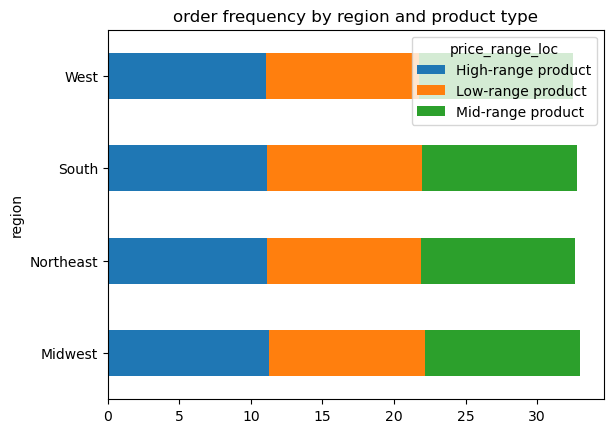

In [577]:
region_order_frequency.plot(
    kind = 'barh',
    stacked = True,
    title = 'order frequency by region and product type'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'region_order_frequency.png'))

### Key Question 8: Is there a connection betrween age and family status in terms of ordering habits? 

In [597]:
single_adults_order_frequency = df_2.groupby('single_adult').agg(order_frequency = ('days_since_prior_order', 'mean')).reset_index()

In [599]:
single_adults_order_frequency

,single_adult,order_frequency
0,N,10.809656
1,Y,10.813571


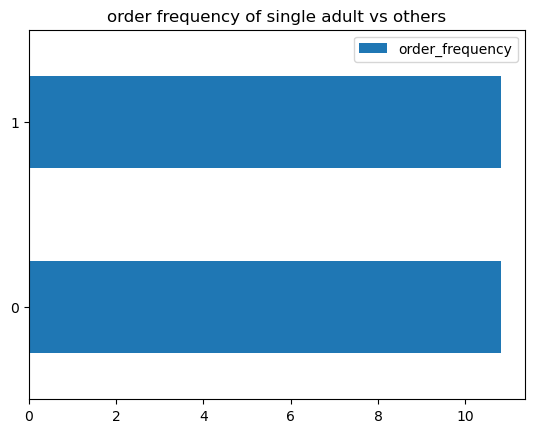

In [603]:
single_adults_order_frequency.plot(
    kind = 'barh',
    title = 'order frequency of single adult vs others'
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'single_adult_order_frequency.png'))

### Key Question 10: What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of

In [1033]:
department_price_range = df_2.groupby(['department_id','price_range_loc'])['product_id'].nunique().reset_index()

In [1034]:
department_price_low_range = department_price_range[department_price_range['price_range_loc'] == 'Low-range product'].sort_values(by = 'product_id')

In [1037]:
department_price_low_range = department_price_low_range.head(5).merge(df_dep, on = 'department_id')

In [1039]:
department_price_low_range

,department_id,price_range_loc,product_id,department
0,10,Low-range product,6,bulk
1,2,Low-range product,165,other
2,8,Low-range product,280,pets
3,5,Low-range product,294,alcohol
4,18,Low-range product,299,babies


In [1045]:
department_price_low_range = department_price_low_range[['department', 'product_id']].sort_values(by = 'product_id', ascending = False).reset_index(drop = True)

In [1047]:
department_price_low_range

,department,product_id
0,babies,299
1,alcohol,294
2,pets,280
3,other,165
4,bulk,6


In [1051]:
department_price_low_range.set_index('department', inplace = True)

In [1053]:
department_price_low_range

,product_id
department,
babies,299
alcohol,294
pets,280
other,165
bulk,6


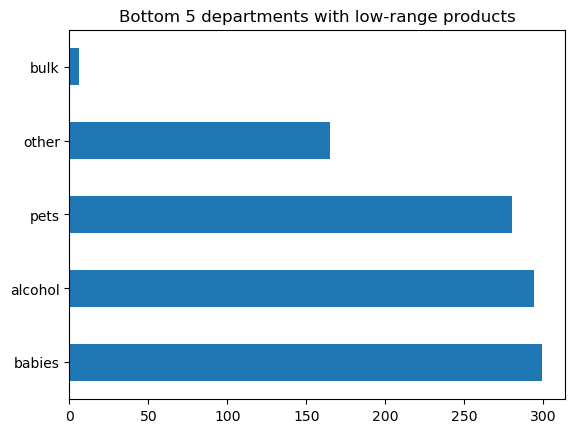

In [1055]:
department_price_low_range.plot(
    kind = 'barh',
    title = 'Bottom 5 departments with low-range products',
    ylabel = '',
    legend = False
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'bottom_5_departments.png'))

In [1057]:
department_price_high_range = department_price_range[department_price_range['price_range_loc'] == 'High-range product'].sort_values(by = 'product_id')

In [1059]:
department_price_high_range = department_price_high_range.head(5).merge(df_dep, on = 'department_id')

In [1061]:
department_price_high_range

,department_id,price_range_loc,product_id,department
0,13,High-range product,1,pantry
1,16,High-range product,2,dairy eggs
2,12,High-range product,544,meat seafood


In [1045]:
department_price_high_range = department_price_high_range[['department', 'product_id']].sort_values(by = 'product_id', ascending = False).reset_index(drop = True)

In [1047]:
department_price_high_range

,department,product_id
0,babies,299
1,alcohol,294
2,pets,280
3,other,165
4,bulk,6


In [1051]:
department_price_high_range.set_index('department', inplace = True)

In [1053]:
department_price_high_range

,product_id
department,
babies,299
alcohol,294
pets,280
other,165
bulk,6


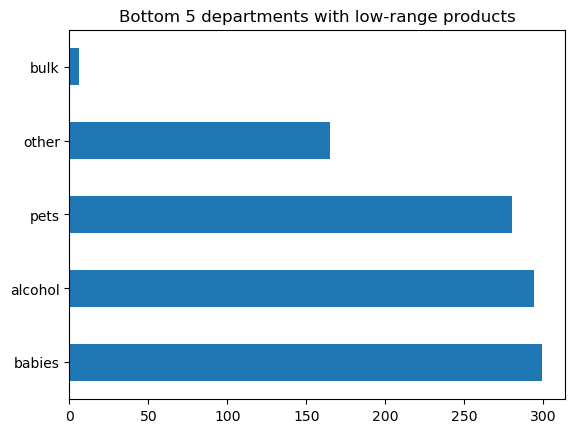

In [1055]:
department_price_high_range.plot(
    kind = 'barh',
    title = 'Bottom 5 departments with low-range products',
    ylabel = '',
    legend = False
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'bottom_5_departments.png'))

In [1067]:
department_high_income = df_2[df_2['income_group'] == 'High']

In [1081]:
department_high_income_2 = department_high_income.groupby(['department_id']).agg(total_sales = ('prices', 'sum')).reset_index()

In [1085]:
department_high_income_2

,department_id,total_sales
1,2,114385.2
9,10,121503.2
20,21,257469.9
7,8,358784.3
4,5,576290.4
5,6,930768.3
17,18,1510448.4
10,11,1563992.0
16,17,2389871.7
13,14,2441414.4


In [1089]:
department_high_income_3 = department_high_income_2.merge(df_dep, on = 'department_id')

In [1093]:
department_high_income_3 = department_high_income_3.drop(columns = 'department_id')

In [1109]:
department_high_income_4 = department_high_income_3.sort_values(by = 'total_sales').head(5)

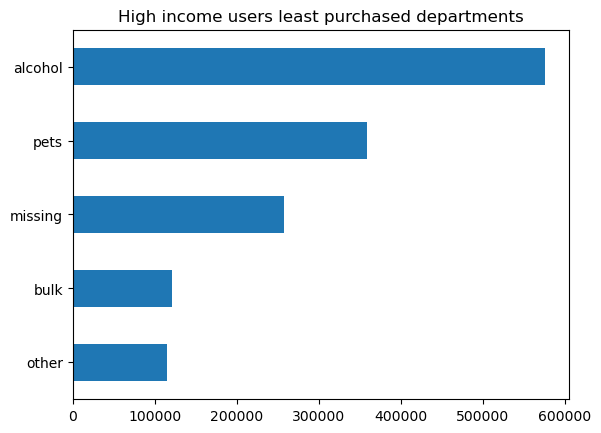

In [1117]:
department_high_income_4.plot(
    kind = 'barh',
    title = 'High income users least purchased departments',
    ylabel = '',
    legend = False
)
plt.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'high_income_departments.png'))